In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
housing = pd.read_csv('datasets/housing.csv')
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
housing = housing.dropna()

In [4]:
housing.shape

(20433, 10)

In [6]:
housing.loc[housing['median_house_value']== 500001].count()
#skewed datasets

longitude             958
latitude              958
housing_median_age    958
total_rooms           958
total_bedrooms        958
population            958
households            958
median_income         958
median_house_value    958
ocean_proximity       958
dtype: int64

In [7]:
housing = housing.drop(housing.loc[housing['median_house_value'] == 500001].index)

In [8]:
housing.shape

(19475, 10)

In [9]:
housing['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [11]:
#one hot encoding
housing = pd.get_dummies(housing, columns= ['ocean_proximity'])

In [12]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0


In [13]:
X = housing.drop('median_house_value', axis= 1)
Y = housing['median_house_value']

In [14]:
X.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [15]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size= 0.2)

In [16]:
x_train.shape, x_test.shape

((15580, 13), (3895, 13))

In [17]:
y_train.shape, y_test.shape

((15580,), (3895,))

In [18]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression(normalize= True).fit(x_train, y_train)

In [19]:
print("Training score: ", linear_model.score(x_train, y_train))

Training score:  0.6145476143650102


In [20]:
predictors = x_train.columns

In [22]:
coef = pd.Series(linear_model.coef_, predictors).sort_values()
print(coef)

ocean_proximity_INLAND        -25942.566261
longitude                     -24608.297650
latitude                      -22403.540540
population                       -29.083094
total_rooms                       -7.217695
households                        33.347035
total_bedrooms                    98.352925
housing_median_age               955.854226
ocean_proximity_NEAR BAY        4805.247226
ocean_proximity_<1H OCEAN      13524.869955
ocean_proximity_NEAR OCEAN     17560.592659
median_income                  38852.230482
ocean_proximity_ISLAND        174004.381711
dtype: float64


In [23]:
y_pred = linear_model.predict(x_test)

In [25]:
df = pd.DataFrame({'predicted': y_pred, 'actual': y_test})
df.head()

,predicted,actual
19086,243545.300897,295700.0
12290,116999.607939,91200.0
15305,122561.894096,173800.0
19979,88115.589234,128900.0
2653,186030.740055,111400.0


In [26]:
from sklearn.metrics import r2_score

print("Testing score: ", r2_score(y_test, y_pred))

Testing score:  0.6054281080873911


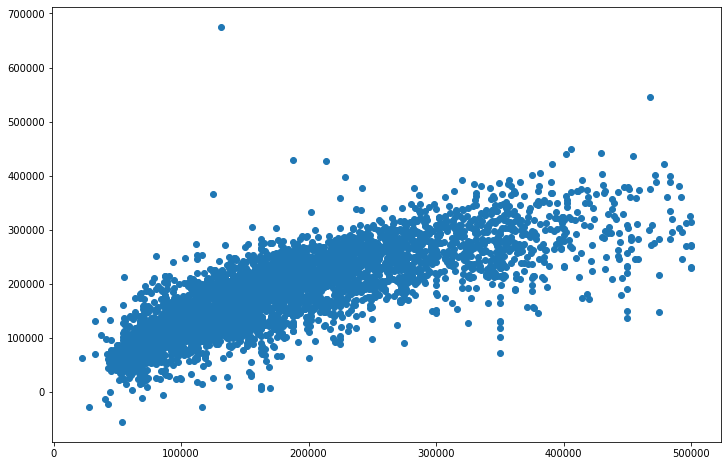

In [27]:
fig, ax = plt.subplots(figsize= (12,8))
plt.scatter(y_test, y_pred)
plt.show()

In [29]:
df_pred_actual = df.sample(100)
df_pred_actual = df_pred_actual.reset_index()
df_pred_actual.head()

,index,predicted,actual
0,15058,303432.854181,294700.0
1,7785,135126.799372,119900.0
2,6401,269332.111438,227300.0
3,17995,378142.589410,283000.0
4,1441,206024.675708,161700.0


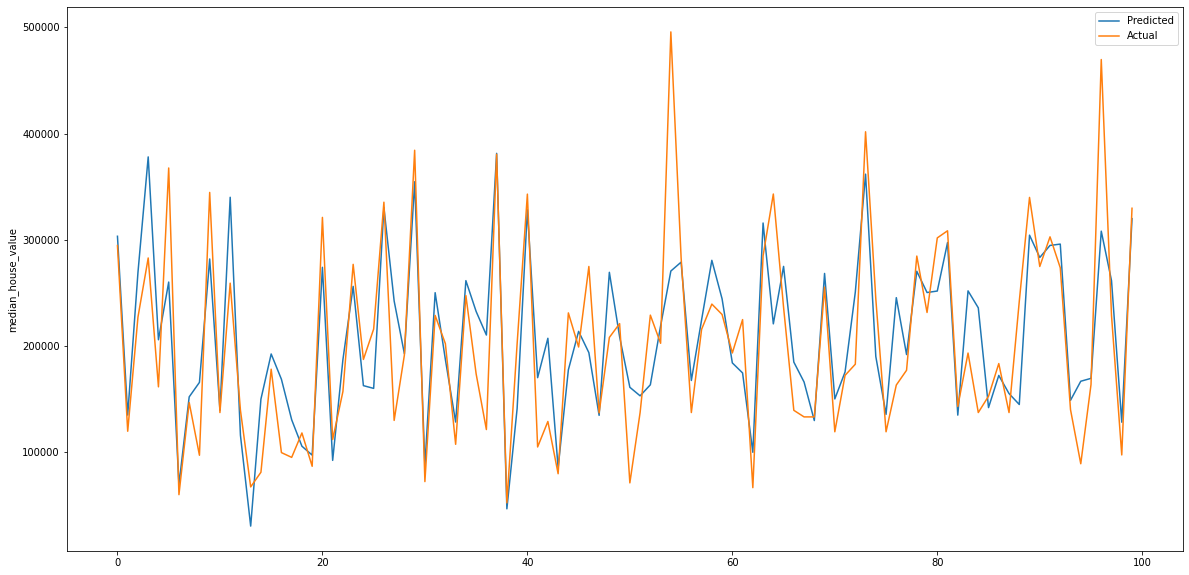

In [30]:
fig, ax = plt.subplots(figsize= (20,10))
plt.plot(df_pred_actual['predicted'], label= 'Predicted')
plt.plot(df_pred_actual['actual'], label= 'Actual')
plt.ylabel('median_house_value')
plt.legend()
plt.show()